In [113]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import matplotlib

# Functions definition
def outlier_treatment(datacolumn):
 datacolumnC = datacolumn
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 datacolumn = [item for item in datacolumn if not (item > upper_range or item < lower_range)]
 datacolumnC = [0 if (item > upper_range or item < lower_range) else item for item in datacolumnC ]
 average_val = statistics.mean(datacolumnC)
 datacolumnC = [average_val if (item == 0) else item for item in datacolumnC ]
 #print('variance after replacing outliers with mean', np.var(datacolumn))
 return datacolumnC

# read file
df = pd.read_csv("data/results_3_Aug_20.csv")

#---------filter by -------
# the ones who completed the questionnaire: reached page 11
df = df[df.lastpage == 11]

print("participants count before removing the response time outliers",
      len(df) ,"\nin average time of:", round(statistics.mean(df.interviewtime)/60,2) ,"mins")

# filter out the outliers of time
filtered_time_range = outlier_treatment(df.interviewtime)
df = df[df['interviewtime'].isin(filtered_time_range)]
df_copy = df
#----------- General Information ---------
average_interview_time = statistics.mean(df.interviewtime)
english_qs = len(df[df.startlanguage == "en"])
german_qs = len(df[df.startlanguage == "de"])
japanese_qs = len(df[df.startlanguage == "jp"])
print("participants count after removing the response time outliers",
      len(df) ,"\nin average time of:", round(average_interview_time/60,2) ,"mins")
print("----\nThe number of answered questionnaire in english:", english_qs, "\ngerman:", german_qs, "\njapanese:", japanese_qs)


#-------demographics ------
age_mean = statistics.mean(df.Q1)
age_std = statistics.stdev(df.Q1)
nationalities = df.Q2.unique()

print("-----\nMean age:", round(age_mean,2), "\nage std:", round(age_std,2), "\nfrom:", nationalities)

# --- tech savvyness for filter

participants count before removing the response time outliers 23 
in average time of: 40.01 mins
participants count after removing the response time outliers 22 
in average time of: 24.0 mins
----
The number of answered questionnaire in english: 21 
german: 1 
japanese: 0
-----
Mean age: 30.73 
age std: 5.62 
from: ['Egypt' 'Germany']


In [114]:
# Health
# Sports
#ActionOne: Food texture
# ActionTwo: Mobile apps feedback
# ActionThree: increase immersion in VR
# PerceptionOne: Cruise Control
# PerceptionTwo: Preemtive action
# PerceptionThree: Stimulated percussions

question_titles = ["Health", "Sports", "ActionOne", "ActionTwo", "ActionThree", "PerceptionOne", "PerceptionTwo", "PerceptionThree"]

for title in question_titles:
    for number  in range (14):
        q_number = str((number+1)).zfill(3)
        condition_name = f"{title}_SQ{q_number}"
        if number+1 <= 6:
         df[condition_name].replace({"Totally Agree": "1", "Agree": "2",
                                     "Partly Agree": "3", "Neutral": "4","Partly Disagree": "5",
                                     "Disagree": "6","Totally Disagree": "7"}, inplace=True)

        else:
         df[condition_name].replace({"Totally Agree": "7", "Agree": "6",
                                     "Partly Agree": "5", "Neutral": "4","Partly Disagree": "3",
                                     "Disagree": "2","Totally Disagree": "1"}, inplace=True)


In [115]:
#-----------------------------------------------------------------------------------
# result_questions group: the count results of the questions, 8 scenarios, 14 questions and 7 categories
result_questions =np.zeros((8,14,7))
group_result = np.zeros((4,14,7))
hci_grouped = np.zeros((3,14,7))

for title_index in range(8):
    title = question_titles[title_index]
    for number  in range (14):
        q_number = str((number+1)).zfill(3)
        condition_name = f"{title}_SQ{q_number}"
        for scale_index in range (7):
         result_questions[title_index,number, scale_index] = len(df[df[condition_name]== str(scale_index+1)])

# grouped_result: data grouped as health, sports, action, perception
group_result[0] = result_questions[0]
group_result[1] = result_questions[1]
group_result[2] = result_questions[2]+result_questions[3]+result_questions[4]
group_result[3] = result_questions[5]+result_questions[6]+result_questions[7]
# hci_grouped: data grouped as health, sports, hci
hci_grouped[0] = result_questions[0]
hci_grouped[1] = result_questions[1]
hci_grouped[2] = group_result[2]+ group_result[3]

#print(hci_grouped)

Int64Index([ 2,  7,  9, 11, 13, 14, 16, 20, 21, 22, 24, 26, 30, 33, 36, 38, 39,
            40, 41, 42, 47, 48],
           dtype='int64')


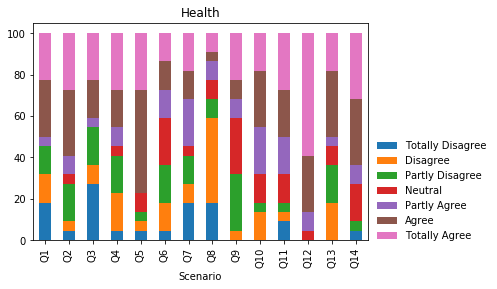

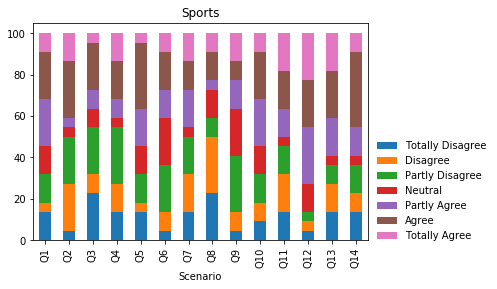

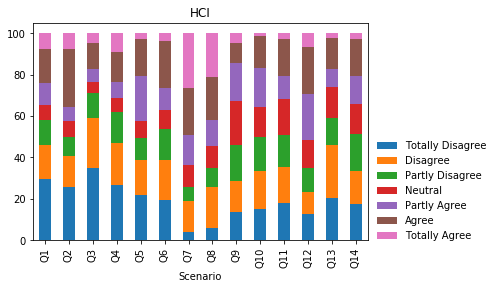

In [117]:
#------------Plotting the data -----------
# the health vs sports vs hci
# finding the percetnage of each answer in each question
for title_index in range(3):
    for number  in range (14):
        hci_grouped[title_index,number]= (hci_grouped[title_index,number]*100)/hci_grouped[title_index,number].sum()

df_hci_grouped = pd.DataFrame([list(l) for l in hci_grouped]).stack().apply(pd.Series).reset_index(1, drop=True)
df_hci_grouped.index.name = 'Scenario'
df_hci_grouped.columns = ['Totally Disagree','Disagree','Partly Disagree','Neutral','Partly Agree','Agree','Totally Agree' ]

print(df.index)

# divide the different scenarios in pd
groups = df_hci_grouped.groupby(df_hci_grouped.index)
scenarios = ['Health', 'Sports', 'HCI']
for (frameno, frame) in groups:
 f= frame.plot(kind='bar', stacked= True)
 plt.legend(loc='upper left', frameon=False , bbox_to_anchor=(1.0, 0.5))
 f.set_title(scenarios[frameno])
 question_labels = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14']
 f.set_xticklabels(question_labels)
plt.show()

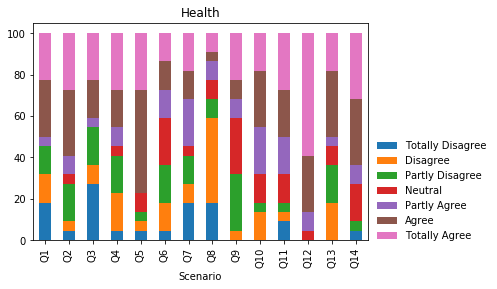

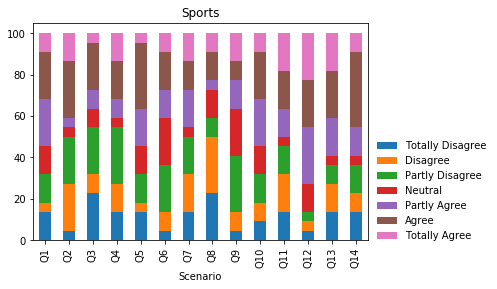

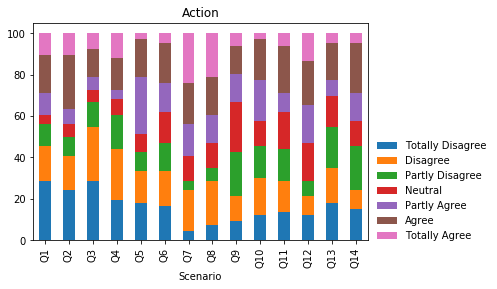

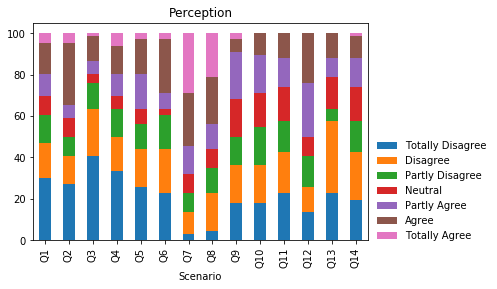

In [119]:
#------------Plotting the data -----------
# the health vs sports vs action vs Perception
# finding the percetnage of each answer in each question
for title_index in range(4): # the number of columns either 8,4,3
    for number  in range (14):
        group_result[title_index,number]= (group_result[title_index,number]*100)/group_result[title_index,number].sum()

df_group_result = pd.DataFrame([list(l) for l in group_result]).stack().apply(pd.Series).reset_index(1, drop=True)
df_group_result.index.name = 'Scenario'
df_group_result.columns = ['Totally Disagree','Disagree','Partly Disagree','Neutral','Partly Agree','Agree','Totally Agree' ]


# divide the different scenarios in pd
four_groups = df_group_result.groupby(df_group_result.index)
scenarios = ['Health', 'Sports', 'Action', 'Perception'] # order mapped from counting the scale
for (frameno, frame) in four_groups:
 f= frame.plot(kind='bar', stacked= True)
 plt.legend(loc='upper left', frameon=False , bbox_to_anchor=(1.0, 0.5))
 f.set_title(scenarios[frameno])
 question_labels = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14']
 f.set_xticklabels(question_labels)
plt.show()


In [61]:
#-----------------------------------------------------------------------------------

[[ 4.  3.  3.  0.  1.  6.  5.]
 [ 1.  1.  4.  1.  2.  7.  6.]
 [ 6.  2.  4.  0.  1.  4.  5.]
 [ 1.  4.  4.  1.  2.  4.  6.]
 [ 1.  1.  1.  2.  0. 11.  6.]
 [ 1.  3.  4.  5.  3.  3.  3.]
 [ 4.  2.  3.  1.  5.  3.  4.]
 [ 4.  9.  2.  2.  2.  1.  2.]
 [ 0.  1.  6.  6.  2.  2.  5.]
 [ 0.  3.  1.  3.  5.  6.  4.]
 [ 2.  1.  1.  3.  4.  5.  6.]
 [ 0.  0.  0.  1.  2.  6. 13.]
 [ 0.  4.  4.  2.  1.  7.  4.]
 [ 1.  0.  1.  4.  2.  7.  7.]] [3. 1. 2. 4. 1. 3. 2. 9. 1. 3. 1. 0. 4. 0.]
